In [17]:
from synthetic_utils import *
import pandas as pd

pd.set_option('display.float_format', '{:.3f}'.format)

df = make_synthetic_df(decay_rate=0.05,
                                   n_sin_periods=200.0,
                                   amplitude=0.2,
                                   sensor_sigmas={'T9':0.002,'T10':0.05,'T11':0.003},
                                   sensor_biases={'T9':0.05},
                                   sensor_gains={'T10':0.01,'T11':0.01}, 
                                   sensor_drifts={'T11':5e-5},
                                   seed=42)

df = df.fillna(0.0)
print(df)



                    date  T0  T1  T2  T3  T4  T5  T6  T7         T8  \
0    2025-01-01 00:00:00 NaN NaN NaN NaN NaN NaN NaN NaN  19.000305   
1    2025-01-01 00:00:01 NaN NaN NaN NaN NaN NaN NaN NaN  18.998960   
2    2025-01-01 00:00:02 NaN NaN NaN NaN NaN NaN NaN NaN  19.000750   
3    2025-01-01 00:00:03 NaN NaN NaN NaN NaN NaN NaN NaN  19.000941   
4    2025-01-01 00:00:04 NaN NaN NaN NaN NaN NaN NaN NaN  18.998049   
...                  ...  ..  ..  ..  ..  ..  ..  ..  ..        ...   
8995 2025-01-01 02:29:55 NaN NaN NaN NaN NaN NaN NaN NaN  34.998904   
8996 2025-01-01 02:29:56 NaN NaN NaN NaN NaN NaN NaN NaN  34.999618   
8997 2025-01-01 02:29:57 NaN NaN NaN NaN NaN NaN NaN NaN  34.999783   
8998 2025-01-01 02:29:58 NaN NaN NaN NaN NaN NaN NaN NaN  34.998935   
8999 2025-01-01 02:29:59 NaN NaN NaN NaN NaN NaN NaN NaN  35.000159   

             T9        T10        T11  T12  T13  T14  T15 source_file  
0     19.049921  19.048412  18.999064  NaN  NaN  NaN  NaN       SYNTH  
1  

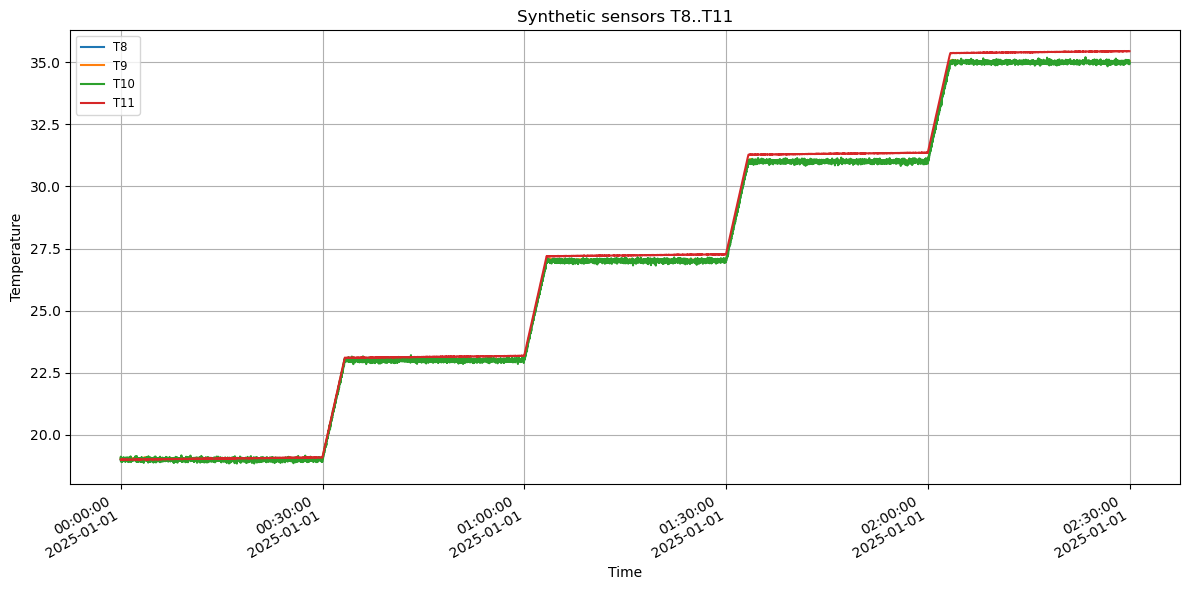

DataFrame сохранен в: synthetic_data.csv


In [18]:
plot_sensor_readings(df, sensors=['T8','T9','T10','T11'], title='Synthetic sensors T8..T11')
save_synthetic_df(df)

In [11]:
from pathlib import Path

CSV_CANDIDATES = [Path('combined_temperatures.csv'), Path('synthetic_data.csv')]
data1 = None
for candidate in CSV_CANDIDATES:
    if candidate.exists():
        print(f'Загружаю данные из {candidate} ...')
        data1 = pd.read_csv(candidate)
        break
if data1 is None:
    raise FileNotFoundError('Не найден ни combined_temperatures.csv, ни synthetic_data.csv рядом с ноутбуком.')

try:
    data1['date'] = pd.to_datetime(data1['date'], format='%Y-%m-%d %H:%M:%S.%f', errors='raise')
except ValueError:
    data1['date'] = pd.to_datetime(data1['date'], errors='coerce')
    if data1['date'].isna().any():
        bad_rows = data1.loc[data1['date'].isna(), 'date'].head(5)
        raise ValueError(f'Не удалось распарсить даты, примеры: {list(bad_rows)}')

if data1.isna().any().any():
    data1 = data1.fillna(0.0)

print('Форма набора данных:', data1.shape)



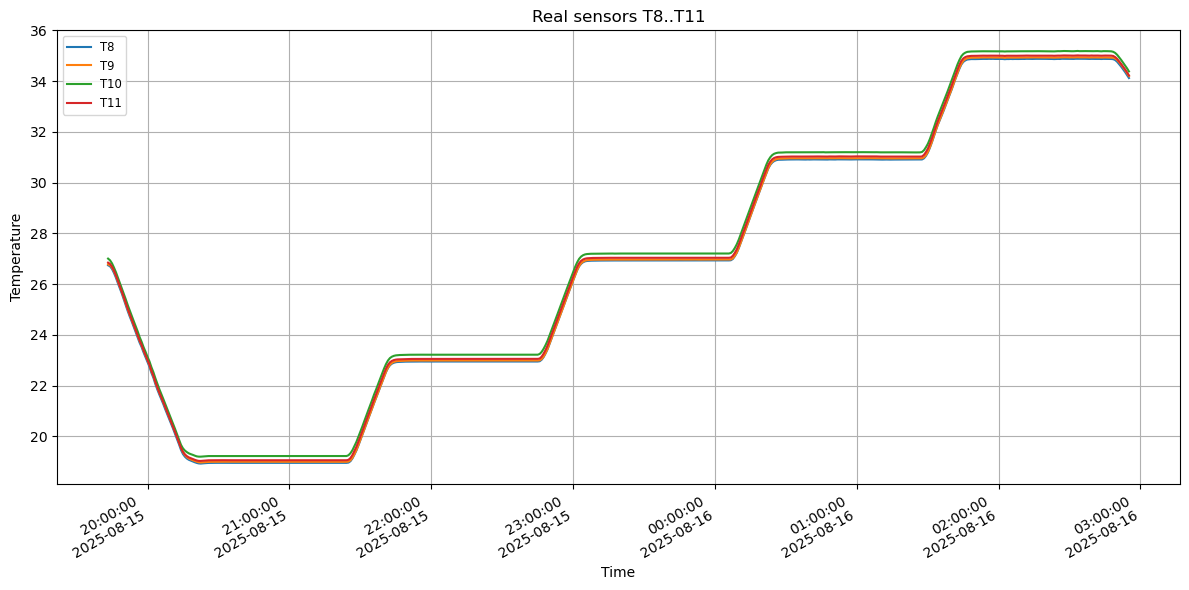

In [15]:
plot_sensor_readings(data1.iloc[::50], sensors=['T8','T9','T10','T11'], time_col='date', title='Real sensors T8..T11')